In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=4)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 80.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37221,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 80.00 GiB
Comm: tcp://127.0.0.1:34841,Total threads: 2
Dashboard: /proxy/42153/status,Memory: 20.00 GiB
Nanny: tcp://127.0.0.1:39645,


In [3]:
# ### Generate new database

# db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
# session = cc.database.create_session(db)

In [9]:
# Global ave temp

In [10]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').temp_global_ave

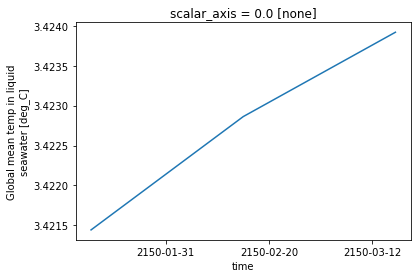

In [6]:
mine_01.plot()

In [7]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output99*/ocean/ocean_scalar.nc', 
                             combine='by_coords').temp_global_ave

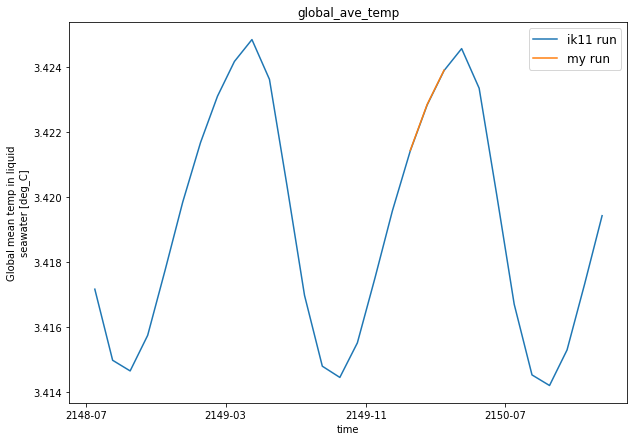

In [8]:
plt.figure(figsize=(10,7))
not_mine_01.plot(label='ik11 run')
mine_01.plot(label='my run')
plt.title('temp_global_ave',fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('comparing_heat.jpg', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'my_run $-$ not_my_run')

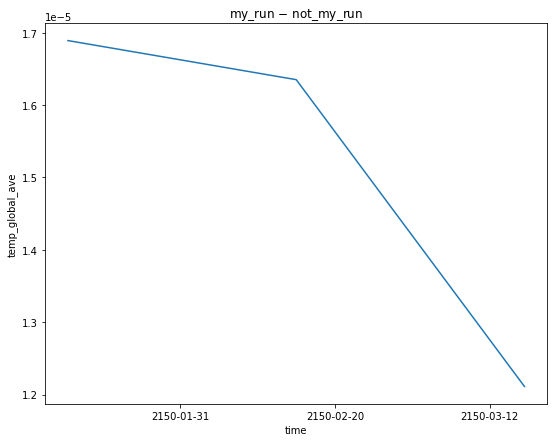

In [9]:
plt.figure(figsize=(9,7))
(mine_01 - not_mine_01).plot()
plt.title('my_run $-$ not_my_run')
# plt.savefig('01_compare_OHC.jpg', dpi=300)

In [4]:
# Global surface temp

In [5]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').temp_surface_ave

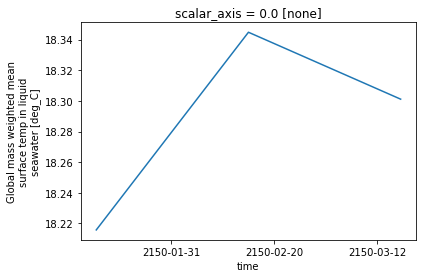

In [6]:
mine_01.plot()

In [7]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').temp_surface_ave

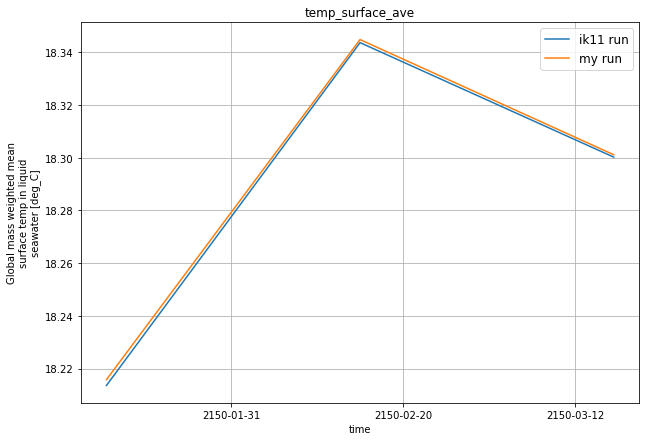

In [8]:
plt.figure(figsize=(10,7))
(not_mine_01).plot(label='ik11 run')
(mine_01).plot(label='my run')
plt.title('temp_surface_ave',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('comparing_sst.jpg', bbox_inches='tight', dpi=300)

In [69]:
# 3D temp

In [70]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_month.nc.0000', 
                             combine='by_coords').temp

plt.figure(figsize=(13,9))
mine_01.isel(st_ocean=0).mean(dim='time').plot()

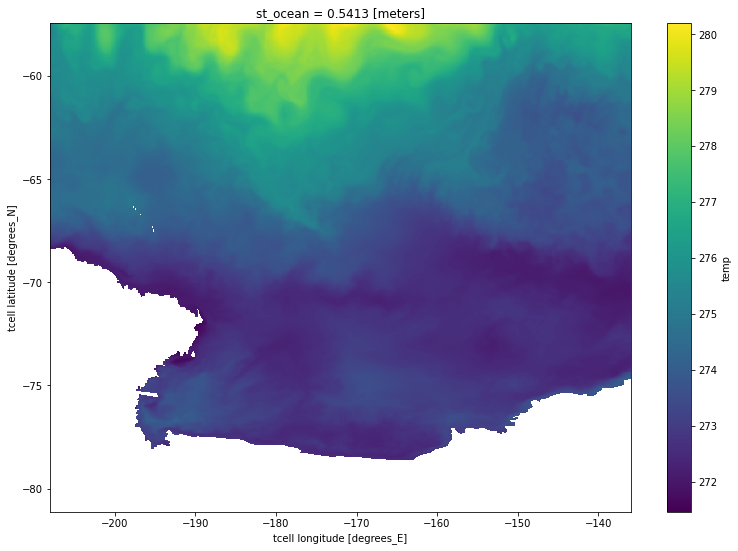

In [77]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_month.nc.0001', 
                             combine='by_coords').temp

plt.figure(figsize=(13,9))
mine_01.isel(st_ocean=0).mean(dim='time').plot()

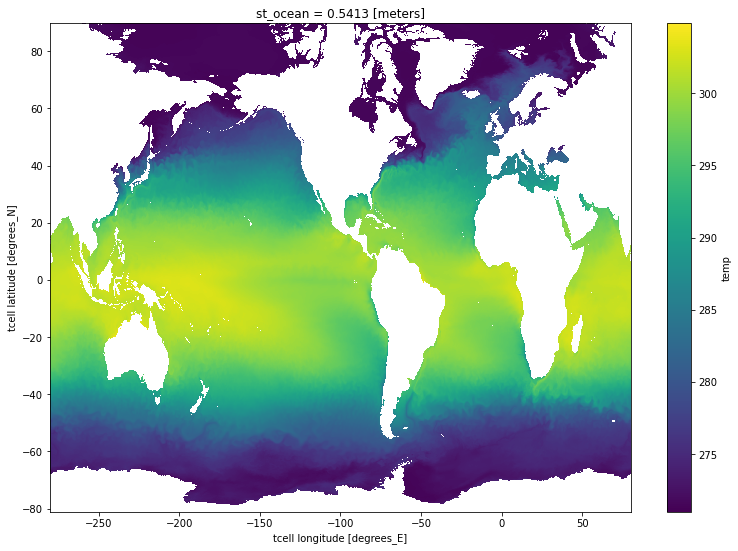

In [79]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output996/ocean/ocean.nc', 
                             combine='by_coords').temp

plt.figure(figsize=(13,9))
not_mine_01.isel(st_ocean=0).mean(dim='time').plot()

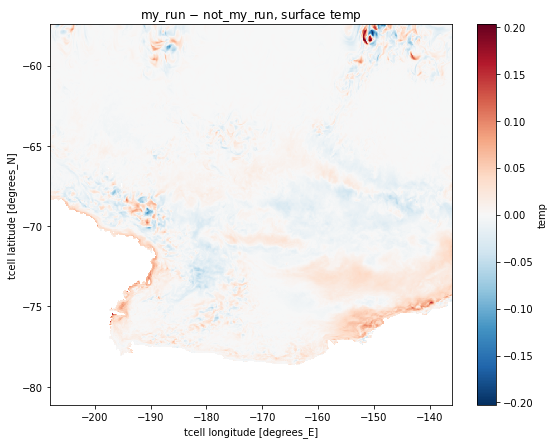

In [76]:
plt.figure(figsize=(9,7))
(mine_01 - not_mine_01).isel(st_ocean=0).mean(dim='time').plot()
plt.title('my_run $-$ not_my_run, surface temp')
plt.savefig('01_compare_surf_temp.jpg', dpi=300)

In [9]:
# Salt

In [10]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').salt_global_ave

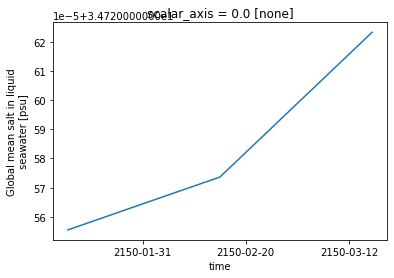

In [11]:
mine_01.plot()

In [12]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output99*/ocean/ocean_scalar.nc', 
                             combine='by_coords').salt_global_ave

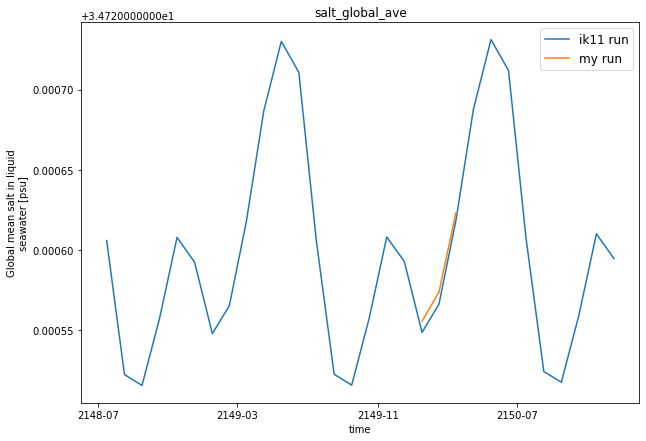

In [13]:
plt.figure(figsize=(10,7))
not_mine_01.plot(label='ik11 run')
mine_01.plot(label='my run')
plt.title('salt_global_ave', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('comparing_salt.jpg', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'my_run $-$ not_my_run')

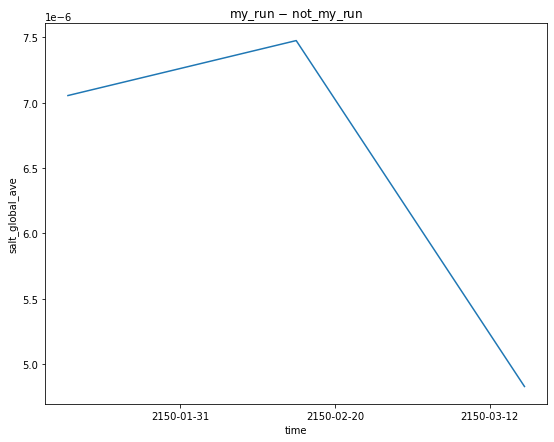

In [15]:
plt.figure(figsize=(9,7))
(mine_01 - not_mine_01).plot()
plt.title('my_run $-$ not_my_run')
# plt.savefig('01_compare_global_salt.jpg', dpi=300)

In [85]:
# Total KE

In [86]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').ke_tot

In [87]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output99*/ocean/ocean_scalar.nc', 
                             combine='by_coords').ke_tot

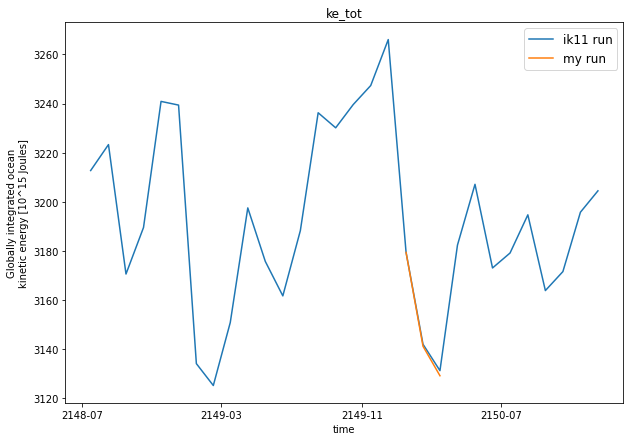

In [88]:
plt.figure(figsize=(10,7))
not_mine_01.plot(label='ik11 run')
mine_01.plot(label='my run')
plt.title('ke_tot', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('comparing_KE.jpg', bbox_inches='tight', dpi=300)

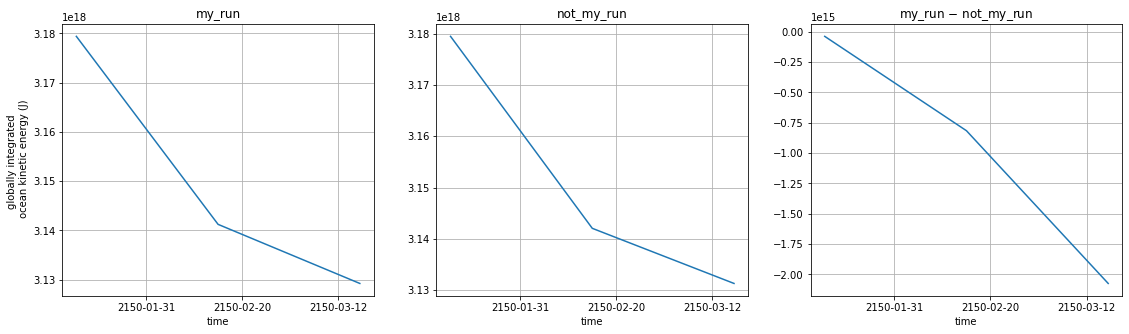

In [82]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize = (19,5))

(mine_01*1e15).plot(ax=ax[0])
ax[0].set_ylabel('globally integrated \n ocean kinetic energy (J)')
ax[0].set_title('my_run')
ax[0].grid()

(not_mine_01*1e15).plot(ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('not_my_run')
ax[1].grid()

(mine_01*1e15 - not_mine_01*1e15).plot(ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('my_run $-$ not_my_run')
ax[2].grid()

# plt.savefig('01_compare_oceanKE.jpg', bbox_inches='tight', dpi=300)

In [55]:
# Heat flux coupling

In [89]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ocean/ocean_scalar.nc', 
                             combine='by_coords').total_ocean_hflux_coupler

In [90]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output99*/ocean/ocean_scalar.nc', 
                             combine='by_coords').total_ocean_hflux_coupler

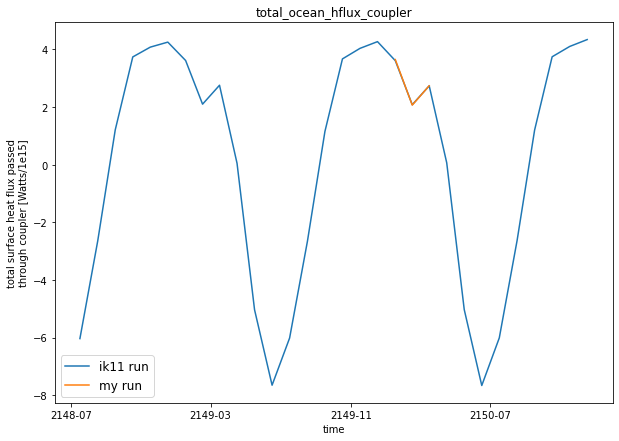

In [91]:
plt.figure(figsize=(10,7))
not_mine_01.plot(label='ik11 run')
mine_01.plot(label='my run')
plt.title('total_ocean_hflux_coupler', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('comparing_SHF.jpg', bbox_inches='tight', dpi=300)

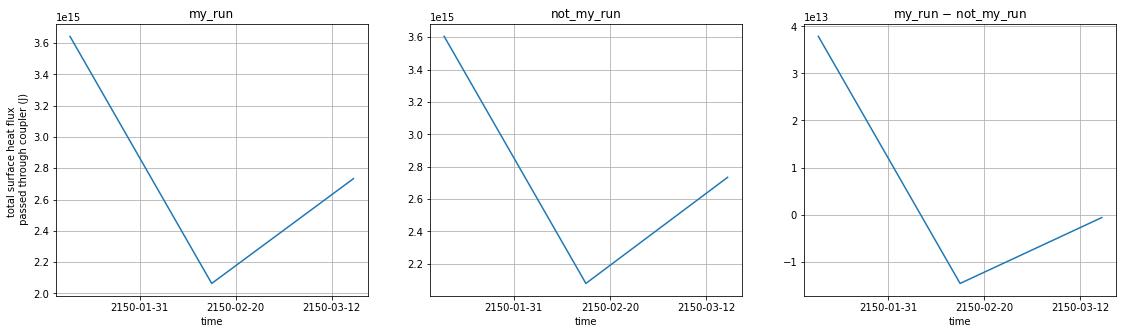

In [90]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize = (19,5))

(mine_01*1e15).plot(ax=ax[0])
ax[0].set_ylabel('total surface heat flux \n passed through coupler (J)')
ax[0].set_title('my_run')
ax[0].grid()

(not_mine_01*1e15).plot(ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('not_my_run')
ax[1].grid()

(mine_01*1e15 - not_mine_01*1e15).plot(ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_title('my_run $-$ not_my_run')
ax[2].grid()

# plt.savefig('01_compare_HFcoupler.jpg', bbox_inches='tight', dpi=300)

In [14]:
# Ice

In [15]:
mine_01 = xr.open_mfdataset(paths='/scratch/e14/mp2135/access-om2/archive/01deg_jra55_ryf_cont/output996/ice/OUTPUT/iceh*', 
                             combine='by_coords').aice_m.mean(dim='time')

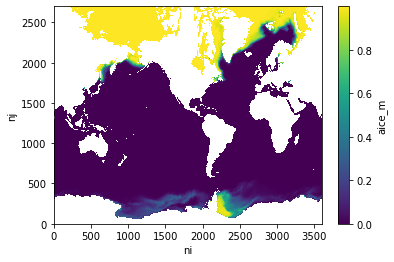

In [16]:
mine_01.plot()

In [17]:
not_mine_01 = xr.open_mfdataset(paths='/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output996/ice/OUTPUT/iceh*', 
                             combine='by_coords').aice_m.mean(dim='time')

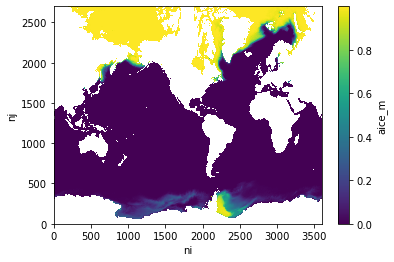

In [18]:
not_mine_01.plot()

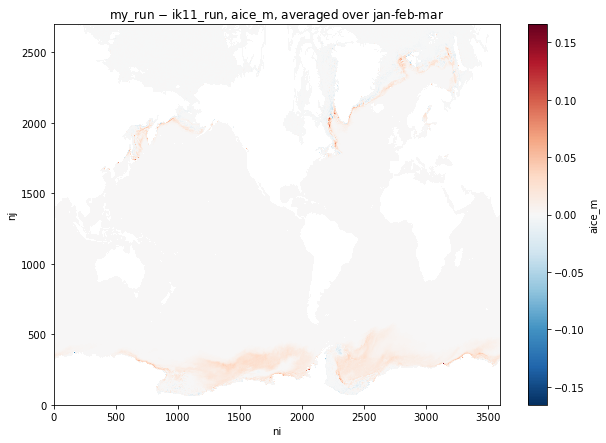

In [23]:
plt.figure(figsize=(10,7))
(mine_01 - not_mine_01).plot()
plt.title('my_run $-$ ik11_run, aice_m, averaged over jan-feb-mar')

plt.savefig('compare_sea_ice_conc.jpg', bbox_inches='tight',dpi=300)